# DSC 680 - Project 3 - Ecological Health Assessment  

## Ashley Deibler

### Variable Description
- Plot_ID: Unique plot identifier to distinguish between different study area locations
- Latitude: geographical latitude measured in degrees
- Longitude: geographical longitude measured in degrees
- DBH (Diameter at Breast Height: diameter of the tree measured at 1.3 meters above ground level, measured in centimeters (cm)
- Tree_Height: total height of tree from base to top, measured in meters (m)
- Crown_Width_North_South: width of tree's crown measured in the north-south direction, measured in meters (m) 
- Crown_Width_East_West: width of tree's crown measured in east-west direction, measured in meters (m)
- Slope: steepness of the terrain where a tree is located, measured in degrees
- Elevation: height of the plot above sea level, measured in meters (m)
- Temperature: average temperature recorded at the plot, measured in degrees Celsius
- Humidity: average humidity at the plot, expressed as percentage
- Soil_TN (Total Nitrogen): concentration of total nitrogen in the soil, measured in grams per kilogram (g/kg)
- Soil_TP (Total Phosphorus): concentration of total phosphorus in the soil, measured in grams per kilogram (g/kg)
- Soil_AP (Available Phosphorus): amount of phosphorus readily available to plants in the soil, measured in grams per kilogram (g/kg)
- Soil_AN (Available Nitrogen): amount of nitrogren readily available to plants in the soil, measured in grams per kilogram (g/kg)
- Menhinick_Index: diversity index that reflects species richness in the area
- Gleason_Index: diversity index that accounts for abundance and richness of species within the community
- Disturbance_Level: categorical variable indicating the level of ecological disturbance in the area (0 = low, 1 = medium, 2 = high)
- Fire_Risk_Index: measure of likelihood of fire occurrence based on environmental conditions, scored between 0-1
- Health_Status: categorical variable indicating the health of the tree, classified as either 'Healthy', or 'Unhealthy'.


### Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### Import Data

In [3]:
df = pd.read_csv('C:/Users/diggy/DSC680-Deibler/foresthealth_data.csv')
df.head(5)

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,Healthy
1,2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy


In [6]:
## make all column names lowercase

df.columns = map(str.lower, df.columns)
df.head(5)

,plot_id,latitude,longitude,dbh,tree_height,crown_width_north_south,crown_width_east_west,slope,elevation,temperature,humidity,soil_tn,soil_tp,soil_ap,soil_an,menhinick_index,gleason_index,disturbance_level,fire_risk_index,health_status
0,1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,Healthy
1,2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy


In [7]:
df.shape

(1000, 20)

In [12]:
## view all column names in list

df.columns.to_list()

['plot_id',
 'latitude',
 'longitude',
 'dbh',
 'tree_height',
 'crown_width_north_south',
 'crown_width_east_west',
 'slope',
 'elevation',
 'temperature',
 'humidity',
 'soil_tn',
 'soil_tp',
 'soil_ap',
 'soil_an',
 'menhinick_index',
 'gleason_index',
 'disturbance_level',
 'fire_risk_index',
 'health_status']

In [10]:
## get data summary for all variables

df.describe(include='all')

,plot_id,latitude,longitude,dbh,tree_height,crown_width_north_south,crown_width_east_west,slope,elevation,temperature,humidity,soil_tn,soil_tp,soil_ap,soil_an,menhinick_index,gleason_index,disturbance_level,fire_risk_index,health_status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441
mean,500.500000,29.610262,-94.508789,52.728544,15.730501,5.446948,5.486180,22.198898,1498.874791,22.027384,59.743599,0.510635,0.255100,0.251220,0.249344,1.762232,2.963965,0.512124,0.509207,NaN
std,288.819436,11.685494,20.453293,27.614049,8.021702,2.581289,2.602753,13.038014,826.251755,9.878208,22.572259,0.283588,0.146605,0.142471,0.145486,0.724376,1.163286,0.287952,0.281458,NaN
min,1.000000,10.185281,-129.774721,5.001105,2.018295,1.000276,1.055654,0.064275,100.698914,5.008503,20.004226,0.010934,0.005078,0.005596,0.005660,0.503300,1.001239,0.000252,0.000854,NaN
25%,250.750000,19.438931,-113.124801,29.828343,8.773222,3.204766,3.244420,10.809975,784.368948,13.728430,41.131530,0.260105,0.130452,0.127690,0.121242,1.136698,1.947451,0.270524,0.277123,NaN
50%,500.500000,29.872295,-93.688627,52.558322,15.559820,5.451383,5.413625,21.808936,1503.573022,21.754533,59.614944,0.511302,0.249754,0.247471,0.243803,1.752412,2.969374,0.523023,0.516489,NaN
75%,750.250000,39.772784,-76.767446,77.114835,22.651143,7.659941,7.658666,34.040896,2171.952127,30.056674,78.897379,0.759135,0.387961,0.377836,0.377283,2.421229,3.987144,0.750194,0.746163,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   plot_id                  1000 non-null   int64  
 1   latitude                 1000 non-null   float64
 2   longitude                1000 non-null   float64
 3   dbh                      1000 non-null   float64
 4   tree_height              1000 non-null   float64
 5   crown_width_north_south  1000 non-null   float64
 6   crown_width_east_west    1000 non-null   float64
 7   slope                    1000 non-null   float64
 8   elevation                1000 non-null   float64
 9   temperature              1000 non-null   float64
 10  humidity                 1000 non-null   float64
 11  soil_tn                  1000 non-null   float64
 12  soil_tp                  1000 non-null   float64
 13  soil_ap                  1000 non-null   float64
 14  soil_an                  

In [14]:
## encode 'Health_Status' column to integer for modeling
df['health_status'] = LabelEncoder().fit_transform(df['health_status'])
df['health_status']

0      0
1      3
2      0
3      2
4      2
      ..
995    2
996    0
997    0
998    3
999    0
Name: health_status, Length: 1000, dtype: int64

##### Encoder Summary:
0 = 'Healthy'
1 = 'Sub-healthy'
2 = 'Unhealthy'
3 = 'Very Healthy'

### Exploratory Data Analysis

#### Univariate Analysis

In [15]:
hs_counts = df['health_status'].value_counts()
hs_counts

health_status
0    441
2    322
3    156
1     81
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


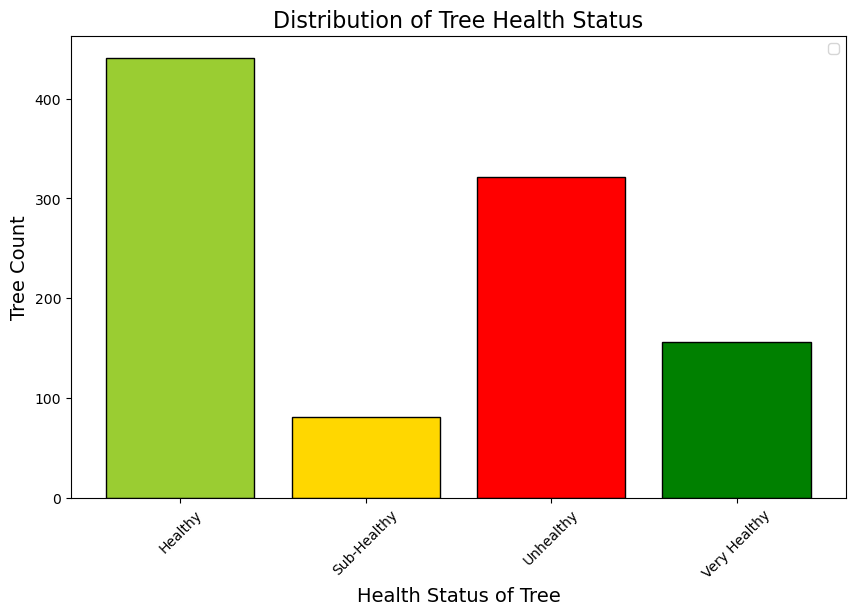

In [20]:
## bar chart to visualize tree health status distribution

plt.figure(figsize=(10,6))

colors = ['yellowgreen', 'red', 'green', 'gold']
labels = ['Healthy', 'Sub-Healthy', 'Unhealthy', 'Very Healthy', ]

plt.bar(hs_counts.index, hs_counts.values,
       color = colors[:len(hs_counts)], edgecolor='black')

plt.xticks(np.arange(len(labels)), labels, rotation=45)

plt.xlabel('Health Status of Tree', fontsize=14)
plt.ylabel('Tree Count', fontsize = 14)

plt.title('Distribution of Tree Health Status', fontsize=16)
plt.legend()

plt.show()

In [90]:
## create visualization functions to visualize multiple variables in the same type of visual (separate plots)

# box plots
def multiboxplot(df, columns):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
    
    for i, col in enumerate(columns):
        row, col_idx=divmod(i,4)
        sns.boxplot(y=df[col], ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f'Box Plot of {col}')
        axes[row, col_idx].set_ylabel(col)
        axes[row, col_idx].set_xlabel('Values')
        
    plt.tight_layout()
    plt.show()
    
# density plots
def multidensityplots(df, columns):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
    
    for i, col in enumerate(columns):
        row, col_idx = divmod(i,4)
        sns.kdeplot(df[col], ax=axes[row, col_idx], shade = True)
        axes[row, col_idx].set_title(f'Density Plot of {col}')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Density')
        
    plt.tight_layout
    plt.show()

# histogram
def multihistplots(df, columns, bins=10):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
    
    for i, col in enumerate(columns):
        row, col_idx = divmod(i,4)
        sns.histplot(df[col], ax=axes[row, col_idx], bins=bins)
        axes[row, col_idx].set_title(f'Histogram of {col}')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Frequency')
        
    plt.tight_layout()
    plt.show()

In [69]:
columns = ['dbh', 'tree_height', 'crown_width_north_south', 'crown_width_east_west',
          'slope', 'elevation', 'temperature', 'humidity', 
           'soil_tn', 'soil_tp', 'soil_ap', 'soil_an',
           'menhinick_index', 'gleason_index', 'disturbance_level', 'fire_risk_index']

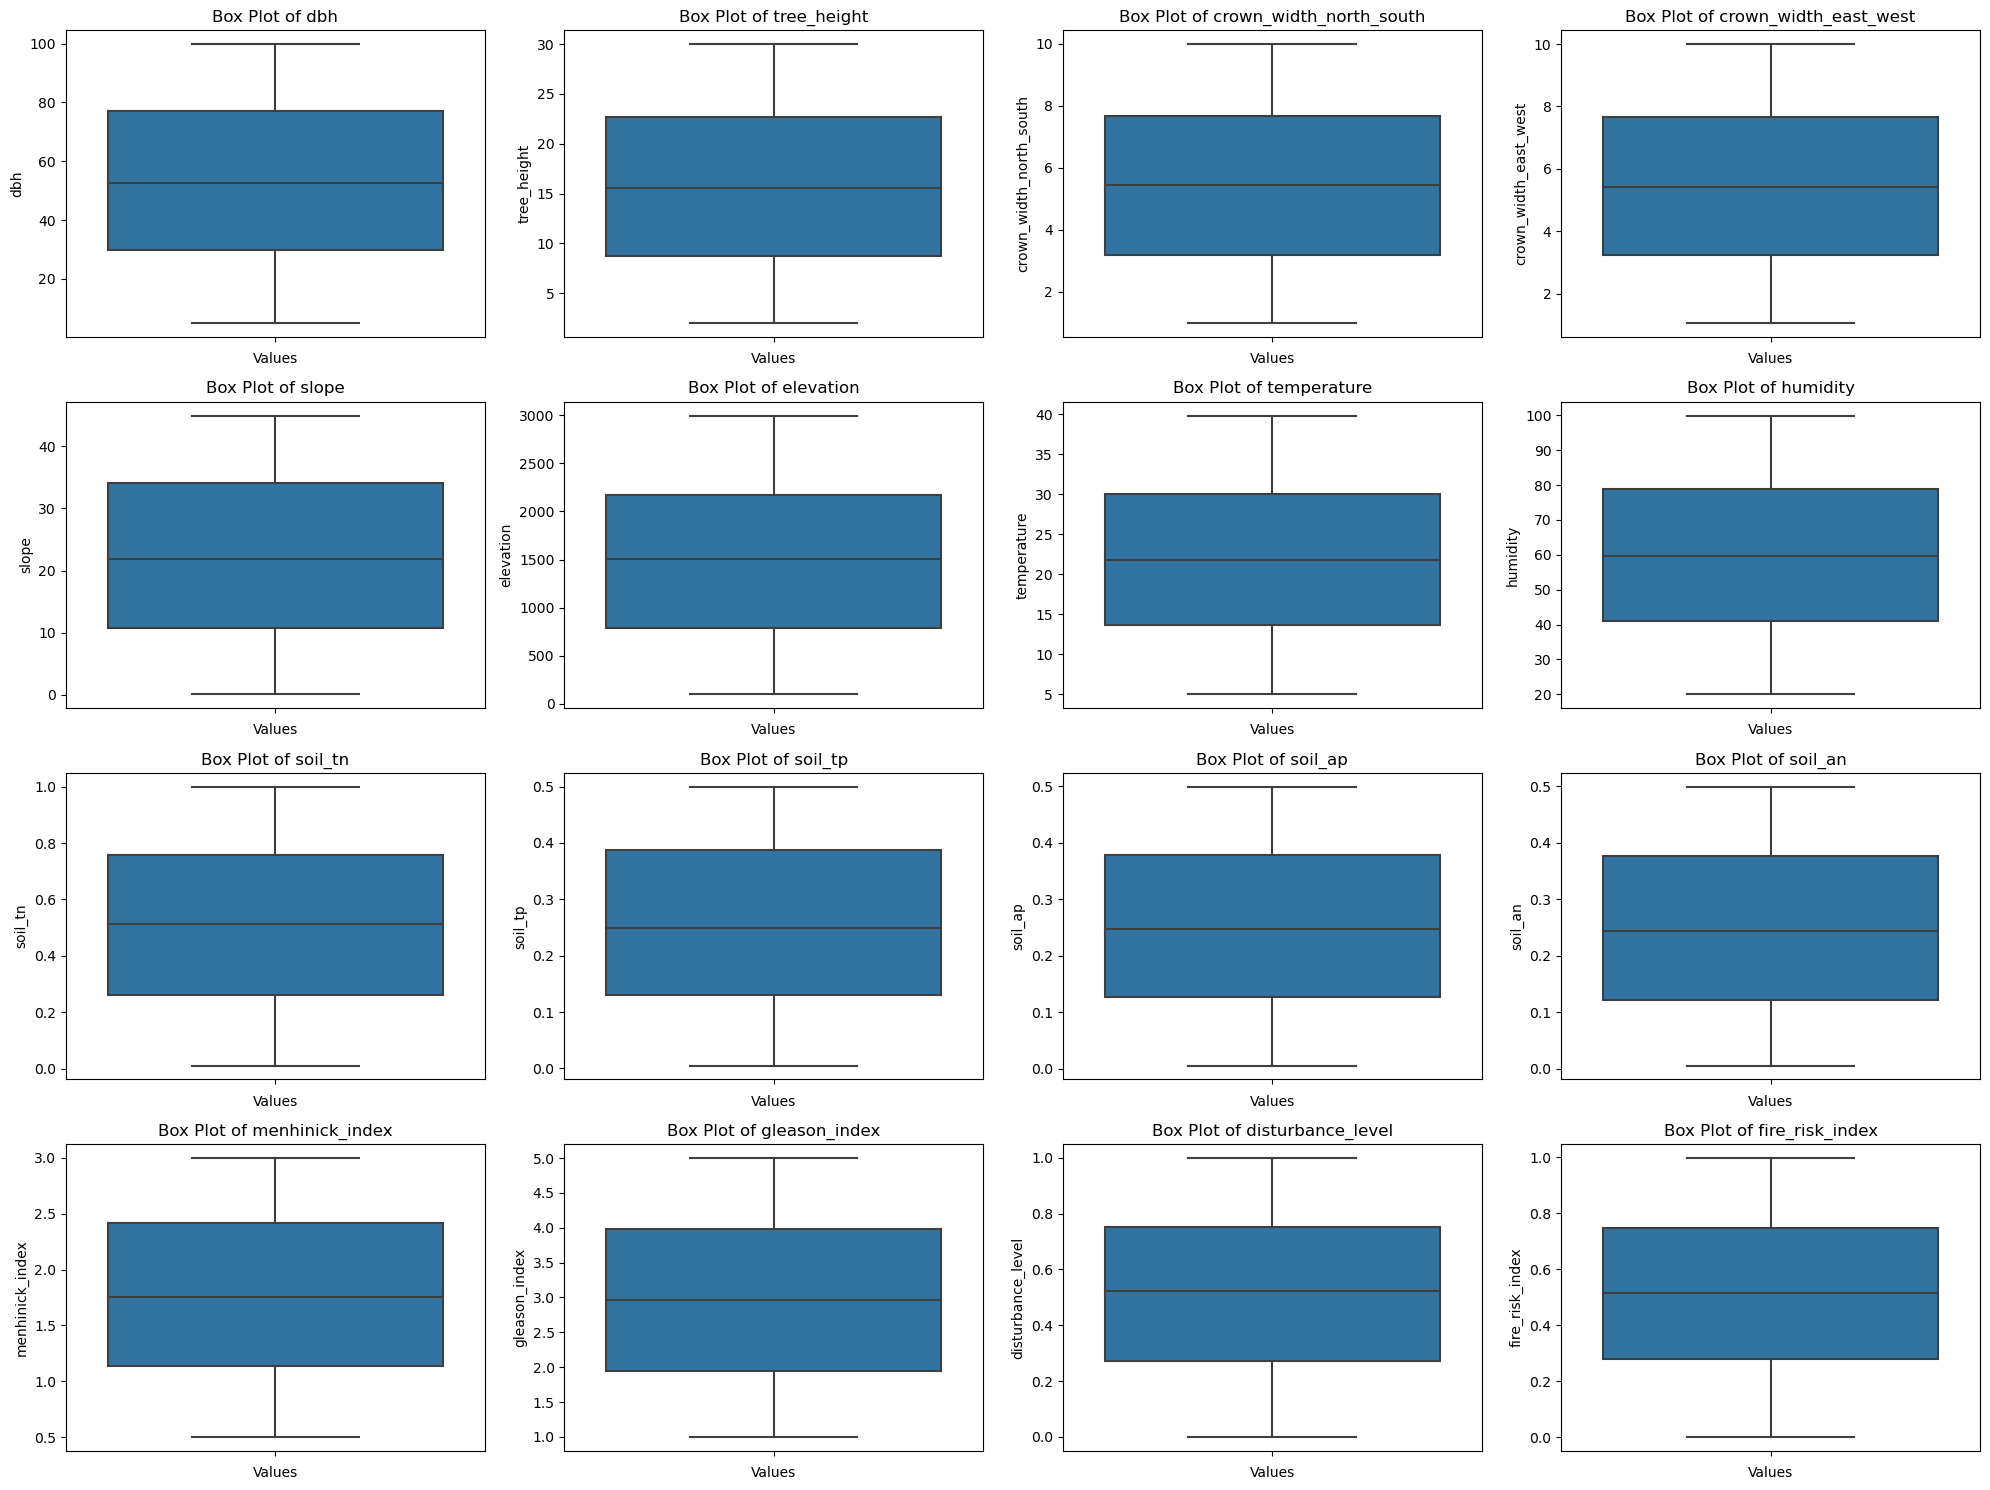

In [84]:
#box plots of DBH, Tree Height, Crown Width (N-S), and Crown Width (E-W)

multiboxplot(df, columns)

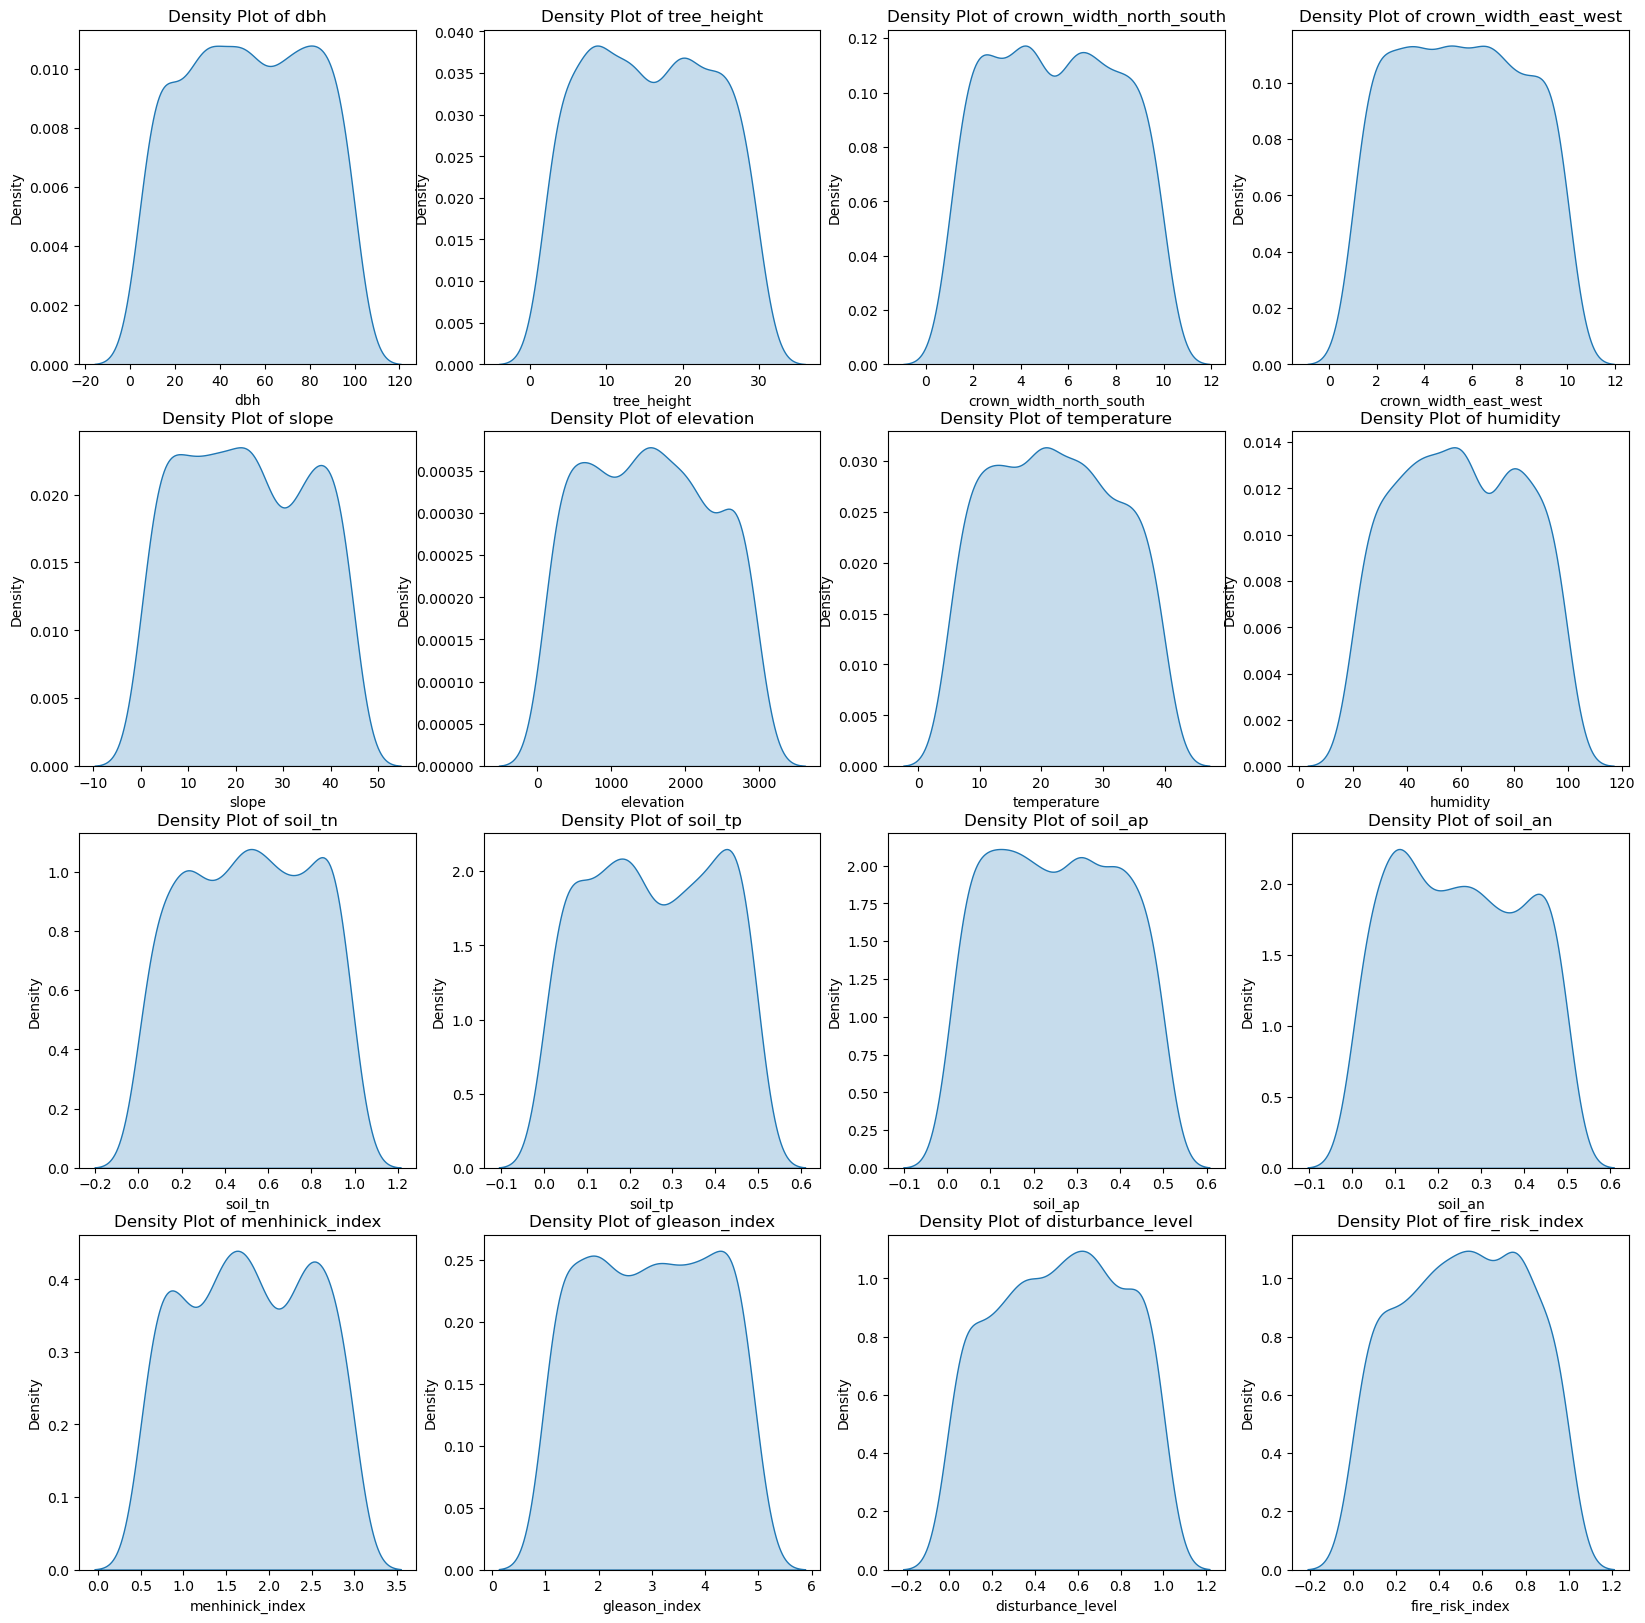

In [88]:
# density plots of DBH, Tree Height, Crown Width (N-S), and Crown Width (E-W)
multidensityplots(df, columns)

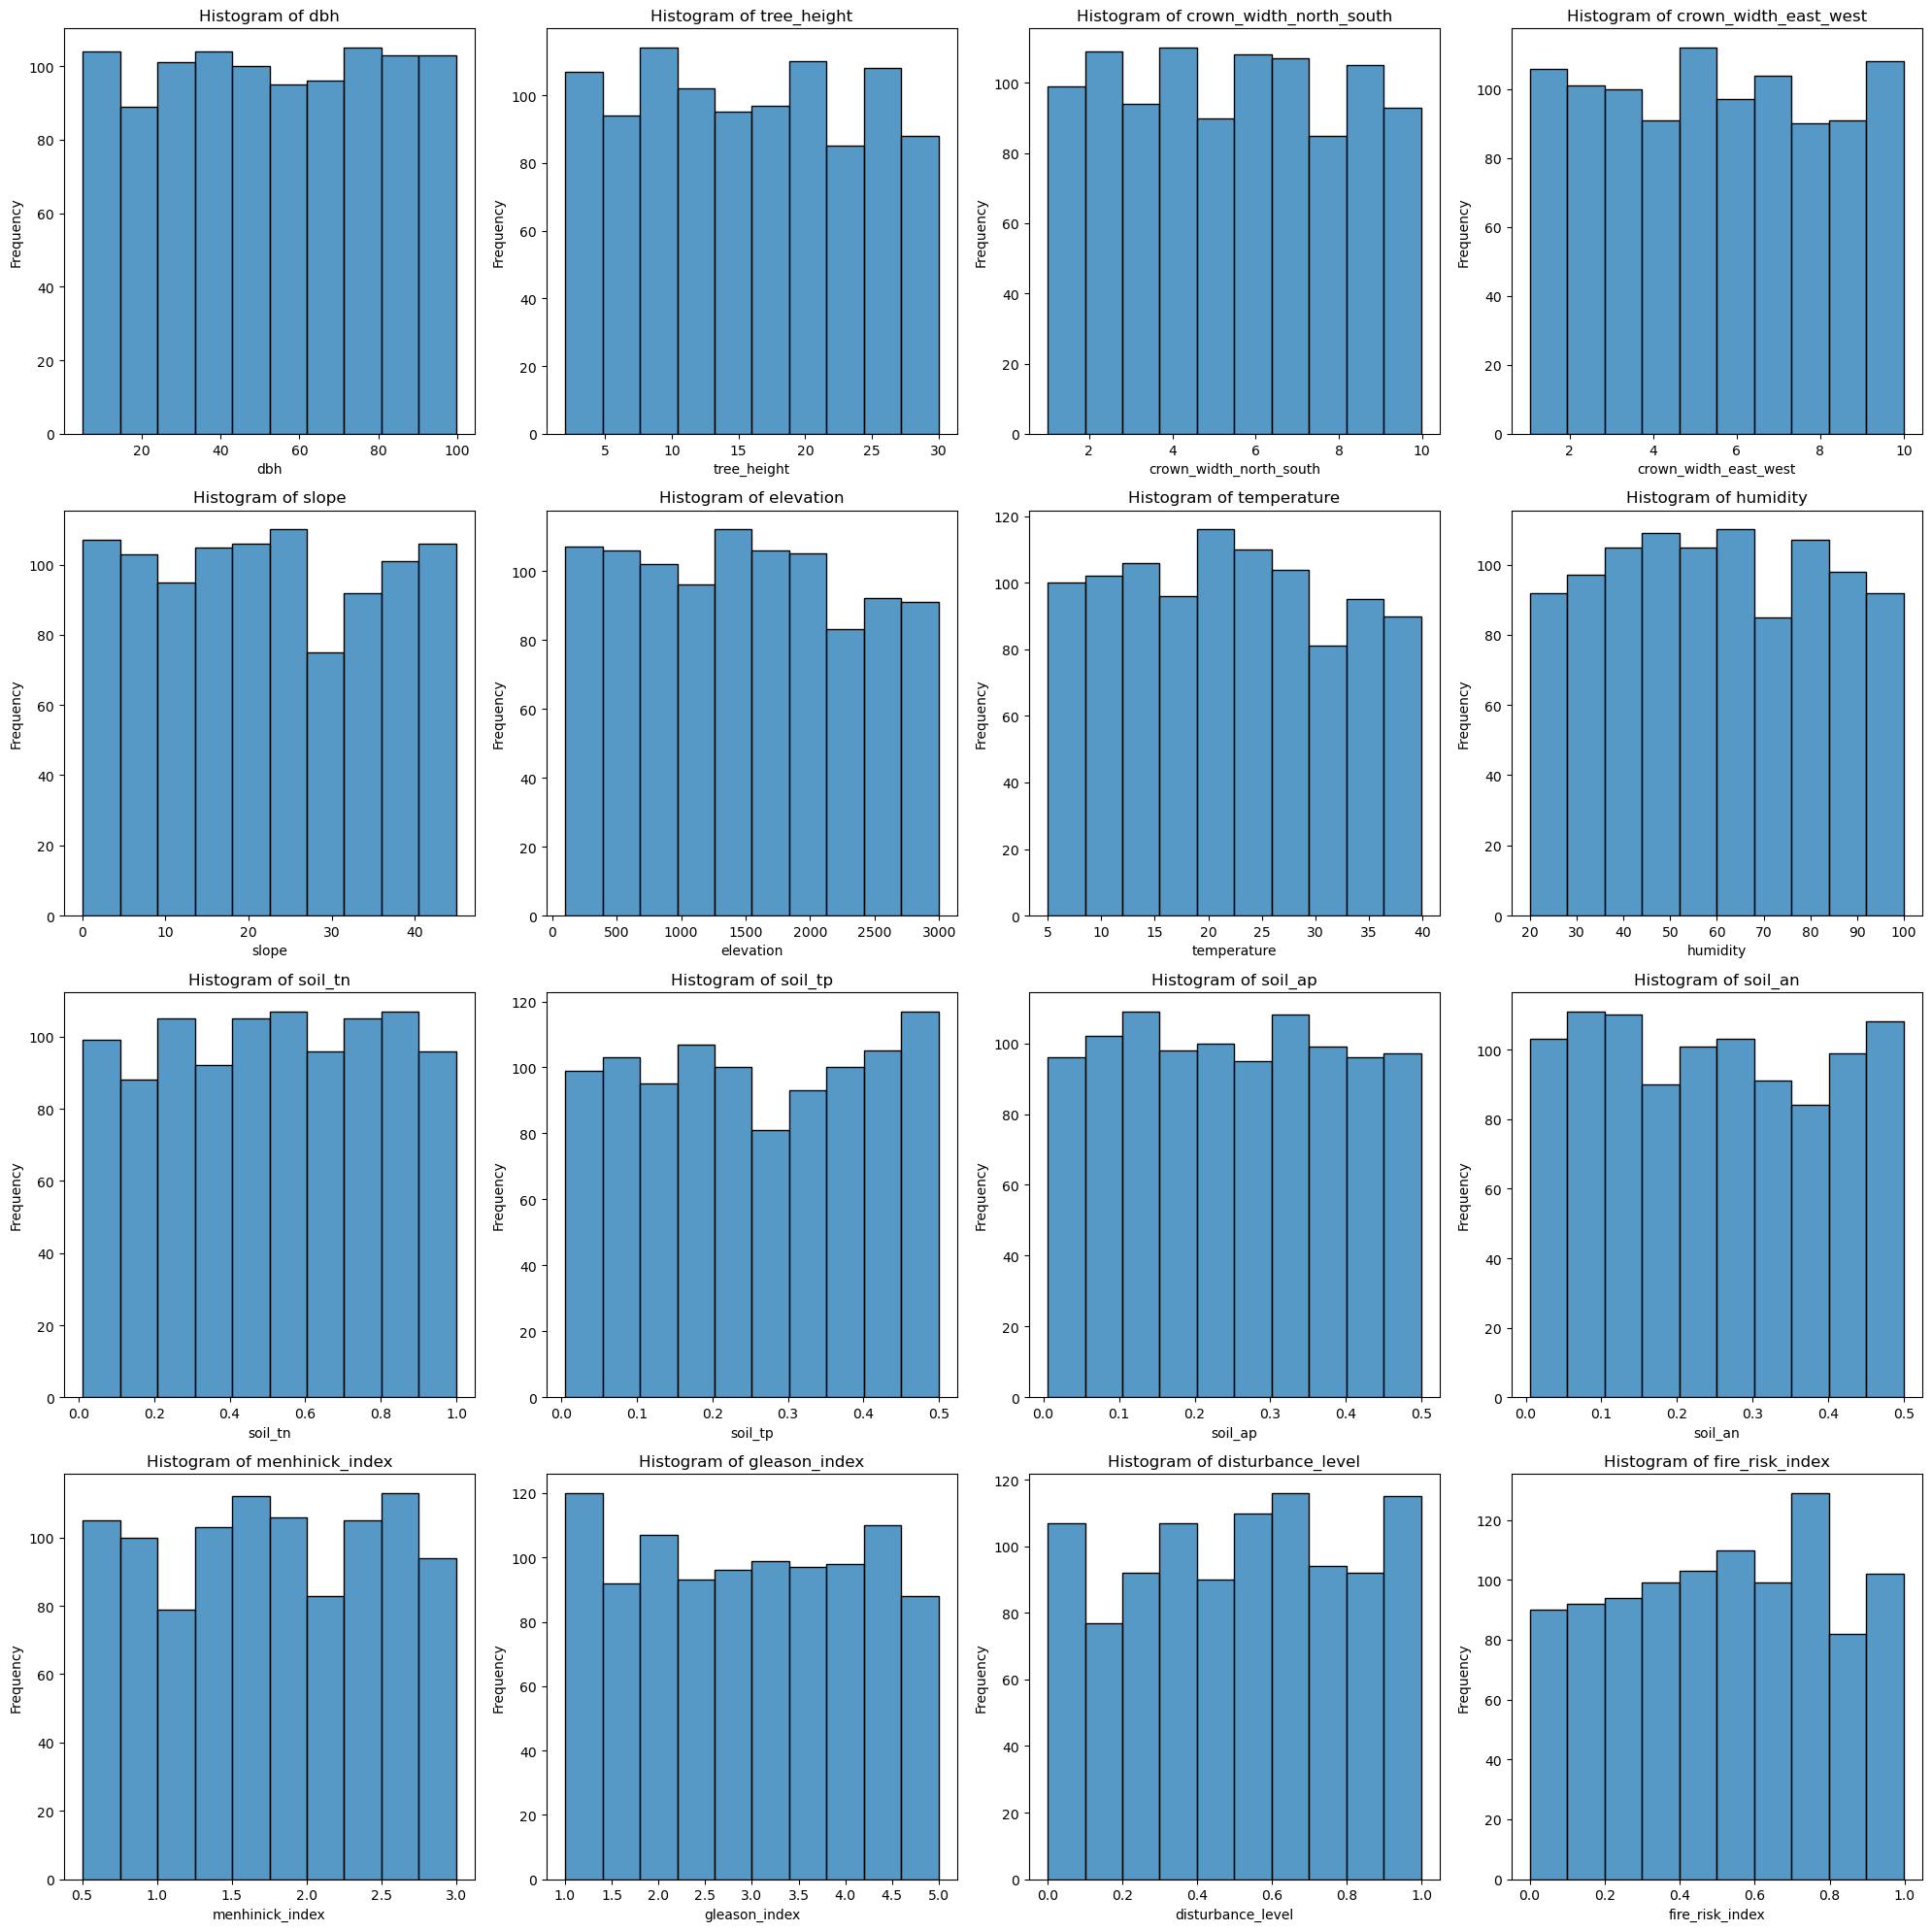

In [91]:
# histograms of DBH, Tree Height, Crown Width (N-S), and Crown Width (E-W)
multihistplots(df, columns)

#### Nutrient Analysis

In [96]:
## calculate nitrogen loss
df['nitrogen_loss'] = df['soil_tn'] - df['soil_an']

## calculate phosphorus loss
df['phosphorus_loss'] = df['soil_tp'] - df['soil_ap']

0     -0.107383
1      0.326082
2     -0.289695
3      0.423699
4      0.471863
         ...   
995    0.150803
996    0.469173
997    0.450191
998    0.062181
999    0.192002
Name: nitrogen_loss, Length: 1000, dtype: float64

In [100]:
## positive loss counts
pos_nit_loss = df[df['nitrogen_loss']>0]['nitrogen_loss'].count()
pos_phos_loss = df[df['phosphorus_loss']>0]['phosphorus_loss'].count()

## negative loss counts
neg_nit_loss = df[df['nitrogen_loss']<0]['nitrogen_loss'].count()
neg_phos_loss = df[df['phosphorus_loss']<0]['phosphorus_loss'].count()


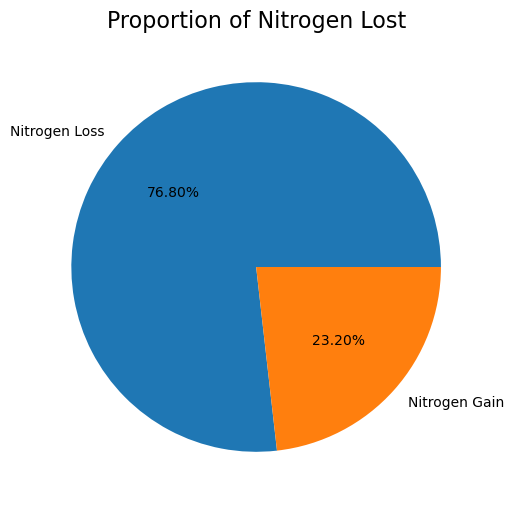

In [104]:
## pie chart to visualize Nitrogen loss
plt.figure(figsize=(10,6))

inx_val = [pos_nit_loss, neg_nit_loss]
inx_labels = ['Nitrogen Loss', 'Nitrogen Gain']

plt.title('Proportion of Nitrogen Lost', fontsize=16)
plt.pie(inx_val, labels=inx_labels, autopct='%2.2f%%')
plt.show()

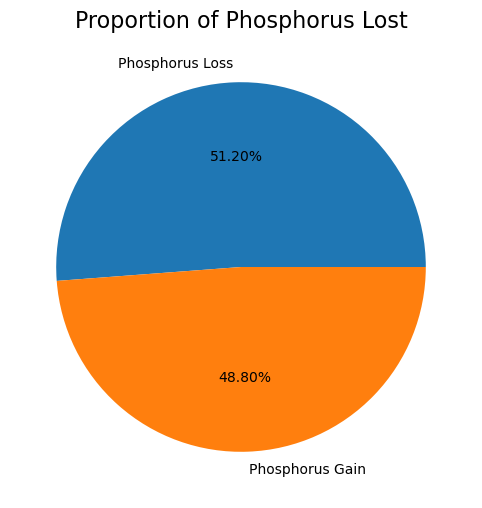

In [106]:
## pie chart to visualize Phosphorus loss
plt.figure(figsize=(10,6))

inx_val = [pos_phos_loss, neg_phos_loss]
inx_labels = ['Phosphorus Loss', 'Phosphorus Gain']

plt.title('Proportion of Phosphorus Lost', fontsize=16)
plt.pie(inx_val, labels=inx_labels, autopct='%2.2f%%')
plt.show()